In [2]:
#importando bibliotecas necessarias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score 

In [3]:
#importando base de dados

data = pd.read_csv('monthly-sunspots.csv')

In [4]:
#visualizando dados
data.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [5]:
#adicionando colunas de Ano e Mes

data['Year'] = 0
data['Month'] = 0

In [6]:
#verificando alteracoes
data.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number,Year,Month
0,0,1749-01-31,96.7,0,0
1,1,1749-02-28,104.3,0,0
2,2,1749-03-31,116.7,0,0
3,3,1749-04-30,92.8,0,0
4,4,1749-05-31,141.7,0,0


In [10]:
#data em formato de data
data['Date'] = pd.to_datetime(data['Date'])
data_lim = data.head(120)

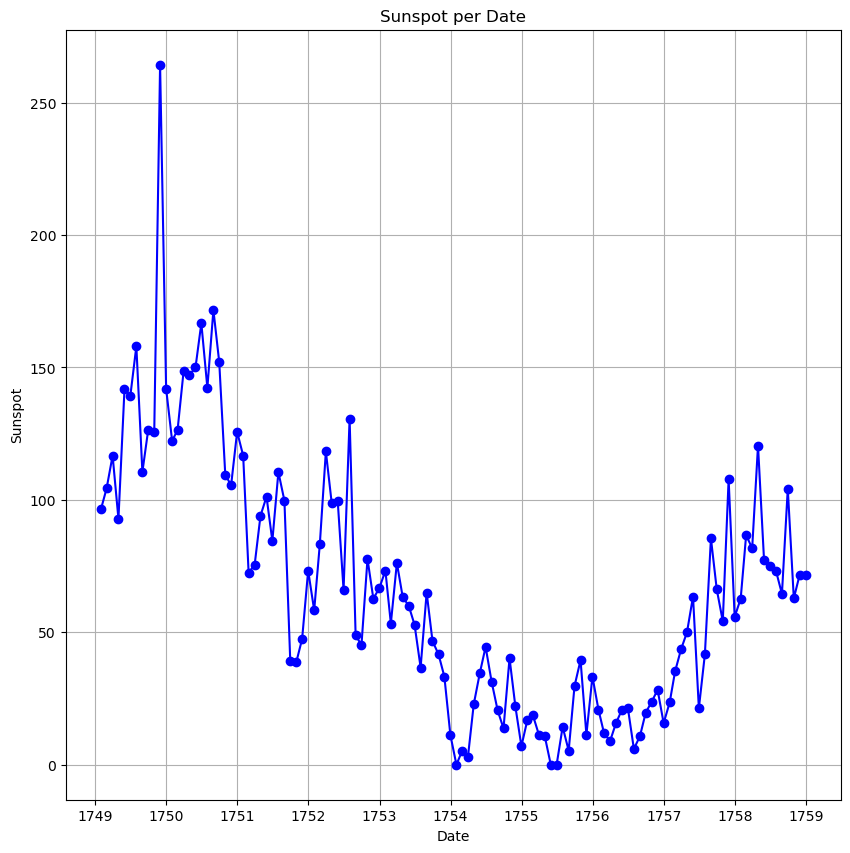

In [11]:
plt.figure(figsize=(10, 10))
plt.plot(data_lim['Date'], data_lim['Monthly Mean Total Sunspot Number'], marker='o', linestyle='-', color='b')
plt.title('Sunspot per Date')
plt.xlabel('Date')
plt.ylabel('Sunspot')
plt.grid('True')
plt.show()

In [133]:
#preenchendo colunas de Ano e Mes
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Days'] = (data['Date'] - data['Date'].min()).dt.days

In [119]:
#verificando atualizacoes
data.tail(10)

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number,Year,Month,Days
3242,3242,2019-03-31,9.4,2019,3,98674
3243,3243,2019-04-30,9.1,2019,4,98704
3244,3244,2019-05-31,9.9,2019,5,98735
3245,3245,2019-06-30,1.2,2019,6,98765
3246,3246,2019-07-31,0.9,2019,7,98796
3247,3247,2019-08-31,0.5,2019,8,98827
3248,3248,2019-09-30,1.1,2019,9,98857
3249,3249,2019-10-31,0.4,2019,10,98888
3250,3250,2019-11-30,0.5,2019,11,98918
3251,3251,2019-12-31,1.6,2019,12,98949


In [110]:
#separando base de treino e de teste
test_data = data[(data['Year'] >= 2010) & (data['Year'] <= 2019)]
train_data = data[(data['Year'] >= 1749) & (data['Year'] <= 2009)]

In [122]:
#definindo x e y e modelo
X = train_data[['Days']]
Y = train_data['Monthly Mean Total Sunspot Number']
X_test = test_data[['Days']]
Y_test = test_data['Monthly Mean Total Sunspot Number']
model = LinearRegression()
erros = []

In [123]:
#validacao cruzada k-fold
for k in range(1, 25):
    if k == 1:
        X_train, X_validation = X[:-1], X[-1:]
        Y_train, Y_validation = Y[:-1], Y[-1:]
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_validation)
        rmse = np.sqrt(mean_squared_error(Y_validation, Y_pred))
        erros.append(rmse)
    else:
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        mse_scores = cross_val_score(model, X, Y, cv=kf, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-mse_scores)
        rmse = np.mean(rmse_scores)
        erros.append(rmse)
    

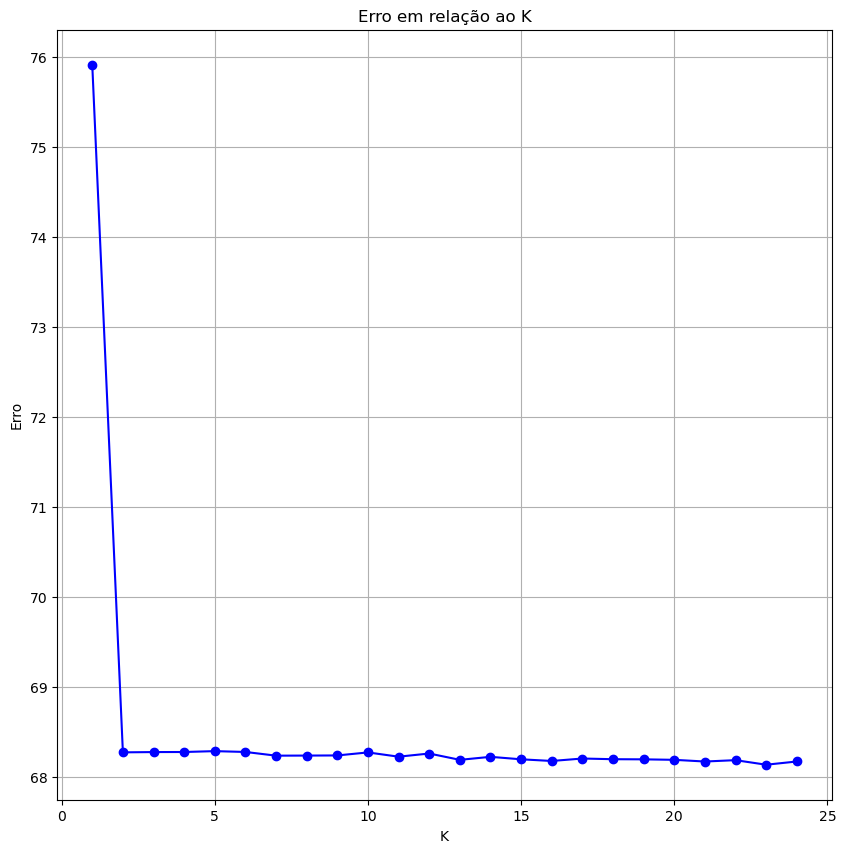

In [124]:
#plotar grafico x = K e y = erro
ks = list(range(1,25))
plt.figure(figsize=(10, 10))
plt.plot(ks, erros, marker='o', linestyle='-', color='b')
plt.title('Erro em relação ao K')
plt.xlabel('K')
plt.ylabel('Erro')
plt.grid(True)
plt.show()

In [125]:
# Determinar o melhor valor de K (menor RMSE)
best_k = np.argmin(erros) + 1
print(f"O melhor valor de K é: {best_k}")

O melhor valor de K é: 23


In [126]:
# Treinar o modelo final com o melhor valor de K e avaliar nos dados de teste
X_test = test_data[['Days']]
kf = KFold(n_splits=best_k)
model.fit(X_train, Y_train)
y_pred_test = model.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(Y_test, y_pred_test))

print(f"RMSE final nos dados de teste: {final_rmse}")

RMSE final nos dados de teste: 56.06757646542668
